## Building website-specific functionality
The real power of selene comes from using it as a starting framework from which to develop website-specific functionality. 

Here, we illustrate building website specific functionality for the CMA's own website. Selene is intentially not a home for website-specific funcitonality to protect anonymity of the CMA's cases. But selene can be used to develop website-specific page classes elsewhere, as shown below:

In [3]:
from selenium.webdriver.common.by import By
from selene.core.logger import get_logger
from selene.core.selenium.driver import get_driver, stop_driver
from selene.core.selenium.page import PageSelene
from selene.core.selenium.conditions import *

### Defining our new Page objects
The starting point for any scraping in selene is the page object. We define two page objects that inherit the general PageSelene class.

In [22]:
class PageCmaCaseList(PageSelene):
    """ a class for pages of the form https://www.gov.uk/cma-cases """
    
    def get_case_links(self):
        """ retrieve the links to any cases listed on a case list page """
        link_elements = self.find_all_soup('a', {'class': 'gem-c-document-list__item-title   govuk-link'})
        links = [x.get('href') for x in link_elements]
        return link_elements
            
    def click_next_page(self, driver):
        """ find the next page button and click on it """
        pass

In [18]:
class PageCmaCase(PageSelene):
    """ a class for the webpage of specific CMA cases, e.g. https://www.gov.uk/cma-cases/vetpartners-limited-slash-goddard-holdco-limited-merger-inquiry """ 
    
    def get_case_name(self, driver):
        """ return the name of the case """
        pass
    
    def get_published_data(self, driver):
        """ return published date for case """
        pass

### Crawling the site using our new objects

In [27]:
driver = get_driver(width=1024, height=768)
logger = get_logger(level='INFO')
url = "https://www.gov.uk/cma-cases/"
page = PageCmaCaseList(driver, url, logger = logger)

2022-05-13 14:34:19 INFO     Logger started


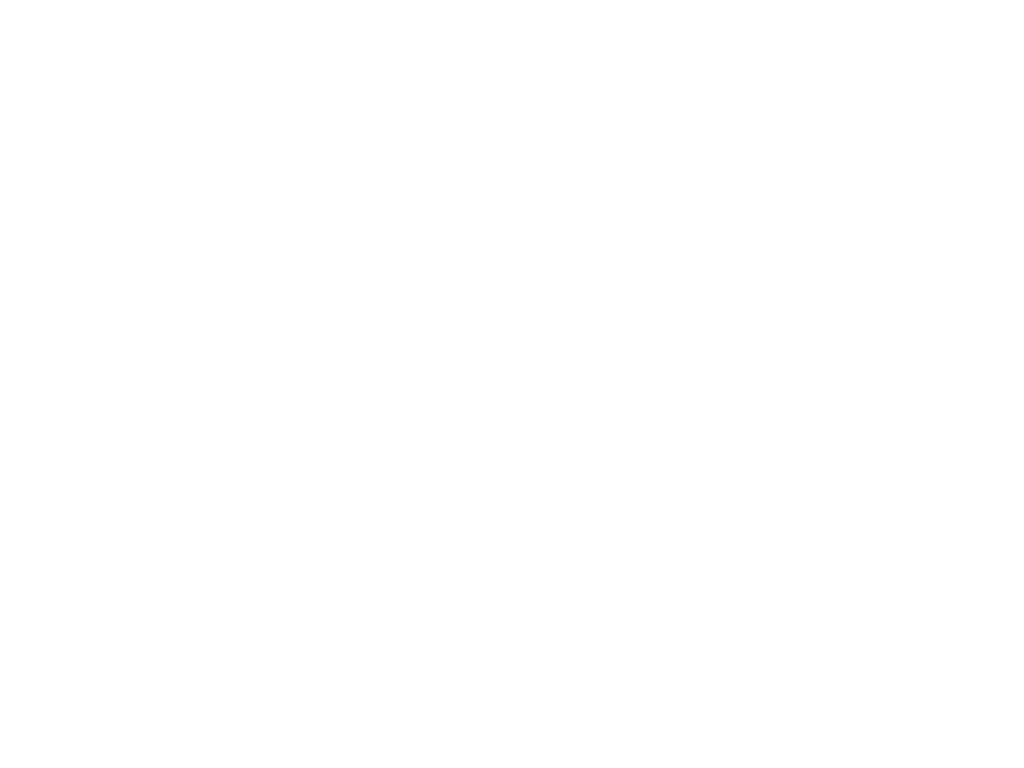

In [28]:
page.screenshot_to_notebook(driver)

In [24]:
case_links = page.get_case_links()

2022-05-13 14:33:46 DEBUG    WORKER-00: find_all: a; {'class': 'gem-c-document-list__item-title   govuk-link'}


In [25]:
case_links

[]

In [ ]:
class PageForm(PageSelene):
    
    def get_table_data(self, driver):
        self.log(f'{self.url}: get_table_data')
        
        values = []
        table = self.find(driver, By.CLASS_NAME, 'table')
        for i, row in enumerate(table.find_all(By.TAG_NAME, 'tr')):
            if i == 0:
                cols = row.find_all(By.TAG_NAME, 'th')
                cols = [col for col in cols if col.text is not None]
                colnames = [col.text.strip().lower().replace(' ', '_') for col in cols]
                continue
            cols = row.find_all(By.TAG_NAME, 'td')
            cols = [col for col in cols if col.text is not None]
            values.append([col.text.strip().lower() for col in cols])
        df = pd.DataFrame(columns=colnames, data=values)
        df['source'] = self.url
        return df

In [ ]:
driver = get_driver(width=1024, height=768)
logger = get_logger(level='DEBUG')

In [ ]:
urls = [f'https://www.scrapethissite.com/pages/forms/?page_num={i}' for i in range(1, 11, 1)]
urls

In [ ]:
%%time
df = pd.DataFrame()
for i, url in enumerate(urls):
    page = PageForm.from_url(driver, url, logger=logger)
    df = df.append(page.get_table_data(driver))
    page.screenshot_to_notebook(driver)

In [ ]:
df

In [ ]:
stop_driver(driver)